# Demand Estimation in Python and R

## Advanced Quantitative Marketing - Arjun Gopinath

In this Jupyter notebook, I display all relevant results from the demand estimation assignment. The model follows Guadagni and Little (1983).

In [1]:
# Standard Python imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Frequently used commands
inv, ax = np.linalg.inv, np.newaxis

matplotlib.rcParams['text.usetex'] = True

<ipython-input-1-b1abb32e66e8>:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Sized, KeysView, Sequence


In [2]:
# Setting up bayesm package from R.

require(bayesm)
require(data.table)

## Part 1 - Microeconometrics of Consumer Demand

The retained households in the datasets have purchased peanut butter in one of the top two chains during the sample period (1993-1995). The eight top-selling peanut butter products are included in the sample. There is also a ninth “no-purchase” option. Each trip has nine observations associated with it containing the price of each alternative, along with the choice made.


In [3]:
%put data --to R

# Importing the dataset into Pandas.

data = pd.read_csv('pbout.txt', sep=" ")
data.reset_index(inplace=True) 
data.dropna(axis='columns', inplace=True)
data.columns = ['panelid', 'date', 'choice', 'price',
                'feature', 'display', 'loyalty']
data = data.astype({'panelid': 'int64', 'date': 'int64',
                  'choice': 'int8', 'feature': 'int8',
                  'display': 'int8', 'loyalty': 'int8'})

Failed to get variable: The feather-format module is required to pass pandas DataFrame as R data.frameSee https://github.com/wesm/feather/tree/master/python for details.


In [29]:
choice_freq = pd.Series(data['choice'].value_counts()/9)
choice_freq.sort_index(inplace=True)

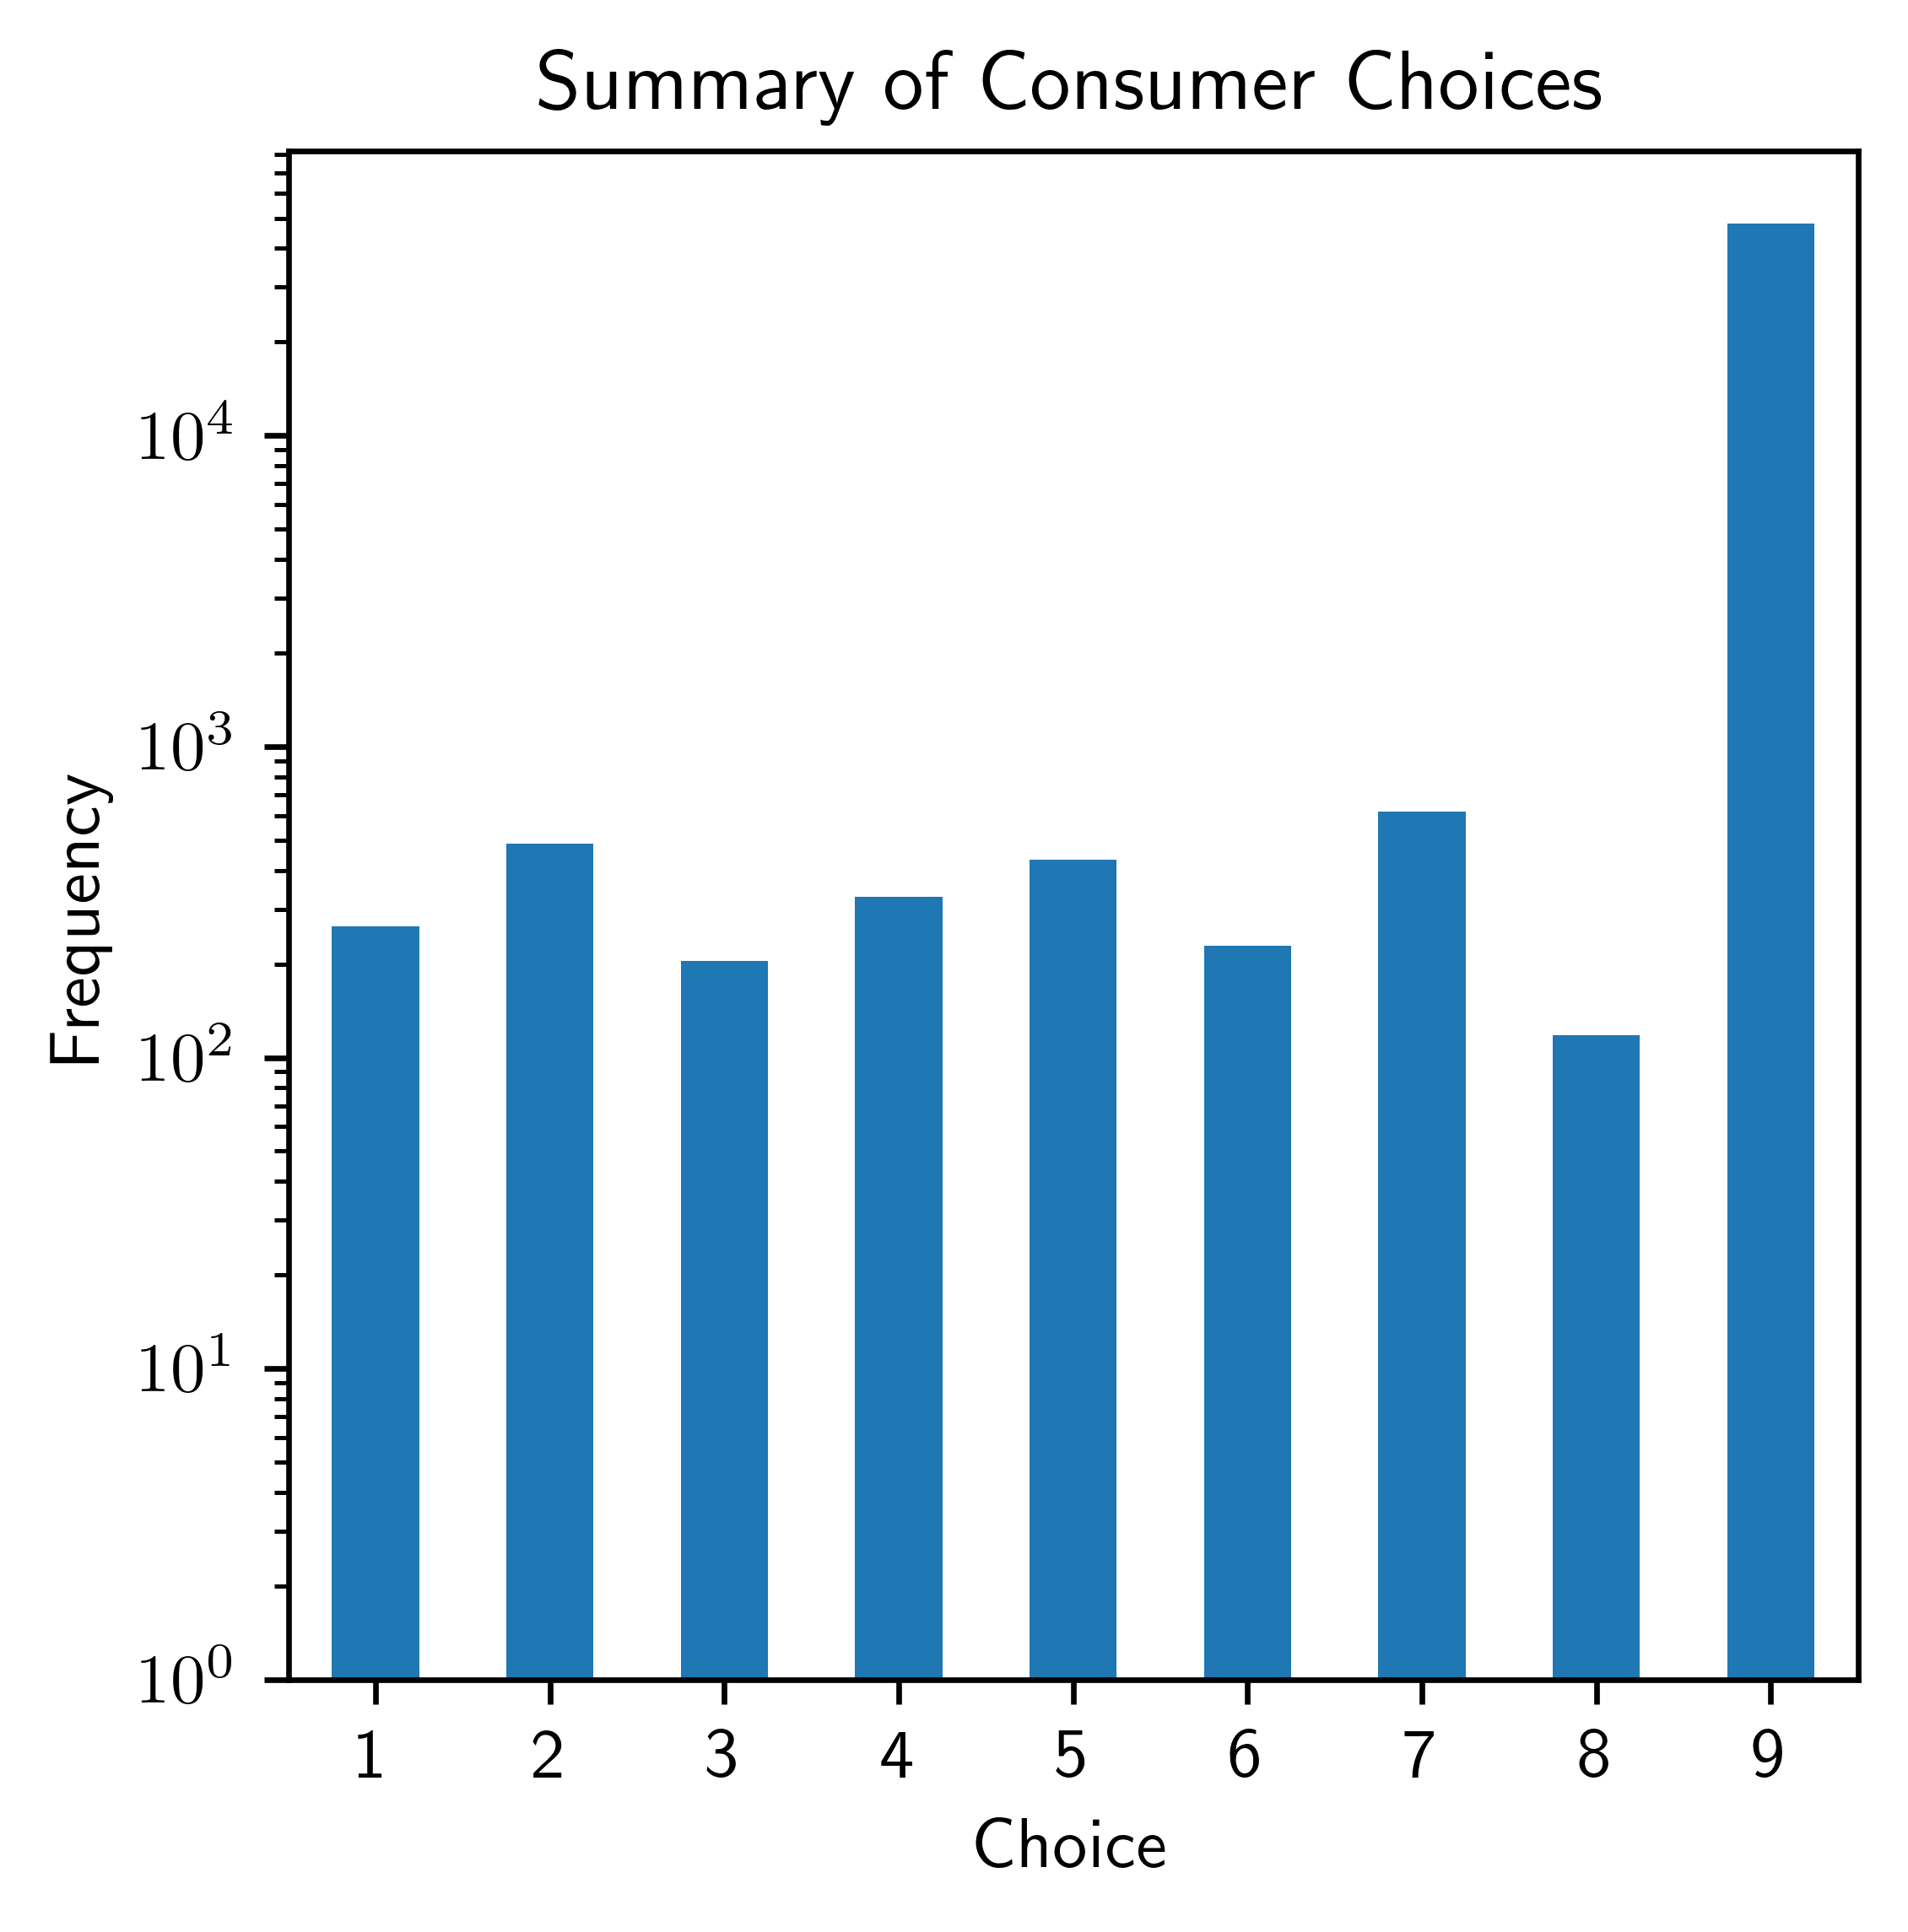

In [30]:
fig1 = plt.figure(figsize=(4, 4), dpi=600);
choice_freq.plot.bar(rot=0, log=True, xlabel='Choice', ylabel='Frequency', 
                     title='Summary of Consumer Choices');